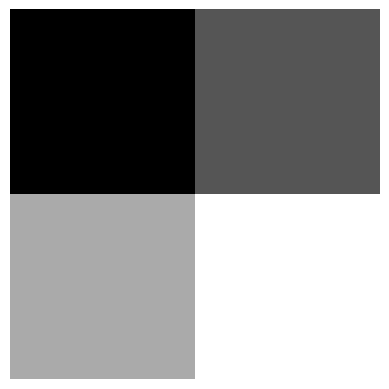

In [2]:
import matplotlib.pyplot as plt

plt.imshow([[1, 2], [3, 4]], cmap='gray')
plt.axis('off')
plt.show()

In [3]:
# load mnist dataset using torch

import torchvision.datasets as datasets

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

mnist_trainset


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [4]:
x_sample, y_sample=mnist_trainset[0]

In [5]:
y_sample

5

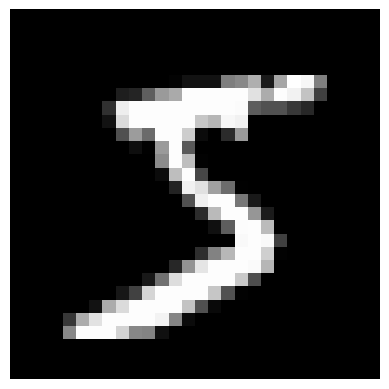

In [6]:

plt.imshow(x_sample, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
import torch
torch.tensor(list(x_sample.getdata()), dtype=torch.float32)

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

## Schritte 

* Dataset bauen
* Modell bauen
* Loss-Funktion, Optimizer
* Trainingsschleife

x.shape: torch.Size([784])
y: tensor(5)


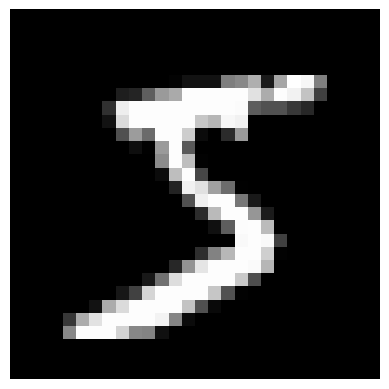

In [8]:
import torch

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, ds):
        self.ds=ds  

    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        # self.ds ist ein Dataset besteht aus Tupeln (x, y) wobei x jeweils ein PIL-Image ist
        x, y=self.ds[idx]
        y=torch.tensor(y)


        # get values of pil image x
        x=torch.tensor(list(x.getdata()), dtype=torch.float32)

        # Ziel: x: als Tensor mit 784 Elementen, y: als Tensor mit 1 Element
        return x, y
    
dataset_sample=MyDataset(mnist_trainset)
x, y=dataset_sample[0]
print("x.shape:", x.shape)          # torch.Size([784])
print("y:", y)                      # tensor(5)

image=x.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
# train test split
from sklearn.model_selection import train_test_split
mnist_trainset, mnist_valset=train_test_split(mnist_trainset, test_size=0.2, random_state=42)

In [ ]:
import torch

x_train=torch.tensor([list(x.getdata()) for x, y in mnist_trainset], dtype=torch.float32)
y_train=torch.tensor([y for x, y in mnist_trainset], dtype=torch.long)

In [ ]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=torch.nn.Linear(784, 100)
        self.fc2=torch.nn.Linear(100, 10)
        self.batch_norm1=torch.nn.BatchNorm1d(100)
        self.relu=torch.nn.ReLU()
        
    def forward(self, xb):
        xb = self.relu(self.fc1(xb))
        xb = self.batch_norm1(xb)
        xb = self.fc2(xb)
        return xb

In [ ]:
from tqdm import tqdm

lr = 0.01
wd = 0.1
torch.manual_seed(42)

batch_size=300
epochs=15
losses=[]

model=MyModel()

train_dataset = MyDataset(mnist_trainset)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                             batch_size=batch_size,
                                             shuffle=True)

optimizer = torch.optim.ASGD(model.parameters(), lr=lr, weight_decay=wd, lambd=0.0001, alpha=0.75, t0=1000000.0)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=1, T_mult=2, eta_min=0.0001, last_epoch=-1, verbose=False)

# train the model
for epoch in range(epochs):
    for x_batch, y_batch in tqdm(train_loader):
        y_pred=model(x_batch)
        loss=torch.nn.functional.cross_entropy(y_pred, y_batch)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# show loss
plt.plot(losses)
plt.show()


NameError: name 'torch' is not defined